In [1]:
    import pandas as pd
    import numpy as np
    import matplotlib.pyplot as plt
    import seaborn as sns
    from sklearn.cluster import KMeans
    from sklearn.linear_model import LinearRegression
    from sklearn.model_selection import train_test_split
    from sklearn.metrics import confusion_matrix

In [2]:
import pandas as pd
df = pd.read_csv('/content/pricerunner_aggregate.csv')

In [3]:
df.head()

,Product ID,Product Title,Merchant ID,Cluster ID,Cluster Label,Category ID,Category Label
0,1,apple iphone 8 plus 64gb silver,1,1,Apple iPhone 8 Plus 64GB,2612,Mobile Phones
1,2,apple iphone 8 plus 64 gb spacegrau,2,1,Apple iPhone 8 Plus 64GB,2612,Mobile Phones
2,3,apple mq8n2b/a iphone 8 plus 64gb 5.5 12mp sim...,3,1,Apple iPhone 8 Plus 64GB,2612,Mobile Phones
3,4,apple iphone 8 plus 64gb space grey,4,1,Apple iPhone 8 Plus 64GB,2612,Mobile Phones
4,5,apple iphone 8 plus gold 5.5 64gb 4g unlocked ...,5,1,Apple iPhone 8 Plus 64GB,2612,Mobile Phones


In [4]:
# Check for missing values
df.isnull().sum()



,0
Product ID,0
Product Title,0
Merchant ID,0
Cluster ID,0
Cluster Label,0
Category ID,0
Category Label,0


In [5]:
# Check any data inconsistencies
df.duplicated().sum()


0

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35311 entries, 0 to 35310
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Product ID       35311 non-null  int64 
 1   Product Title    35311 non-null  object
 2    Merchant ID     35311 non-null  int64 
 3    Cluster ID      35311 non-null  int64 
 4    Cluster Label   35311 non-null  object
 5    Category ID     35311 non-null  int64 
 6    Category Label  35311 non-null  object
dtypes: int64(4), object(3)
memory usage: 1.9+ MB


In [7]:
df.describe()

,Product ID,Merchant ID,Cluster ID,Category ID
count,35311.000000,35311.000000,35311.000000,35311.000000
mean,26150.800176,120.501883,30110.687633,2618.142930
std,13498.191220,117.045557,18410.265642,3.600708
min,1.000000,1.000000,1.000000,2612.000000
25%,14958.500000,17.000000,6123.000000,2615.000000
50%,27614.000000,75.000000,40630.000000,2619.000000
75%,37508.500000,253.000000,44059.000000,2622.000000
max,47358.000000,371.000000,47525.000000,2623.000000


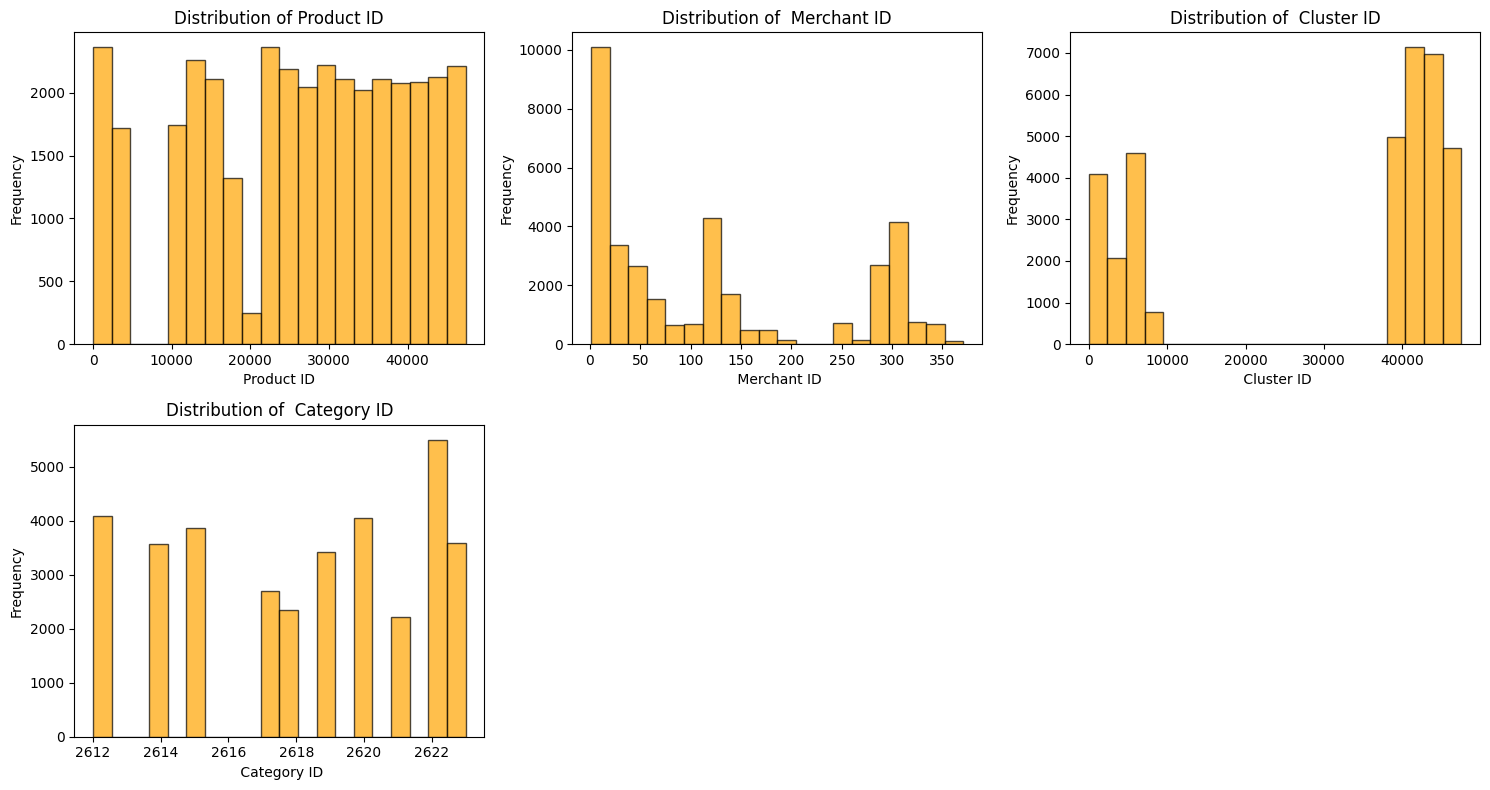

In [8]:
import matplotlib.pyplot as plt
import math

# List of numerical columns in the dataset
numerical_columns = df.select_dtypes(include=['float64', 'int64']).columns
num_columns = len(numerical_columns)
num_rows = math.ceil(num_columns / 3)  # 3 columns per row
plt.figure(figsize=(15, num_rows * 4))
for i, column in enumerate(numerical_columns, 1):
    plt.subplot(num_rows, 3, i)
    plt.hist(df[column], bins=20, color='orange', edgecolor='black', alpha=0.7)
    plt.title(f'Distribution of {column}')
    plt.xlabel(column)
    plt.ylabel('Frequency')
plt.tight_layout()
plt.show()


In [9]:
df.columns

Index(['Product ID', 'Product Title', ' Merchant ID', ' Cluster ID',
       ' Cluster Label', ' Category ID', ' Category Label'],
      dtype='object')

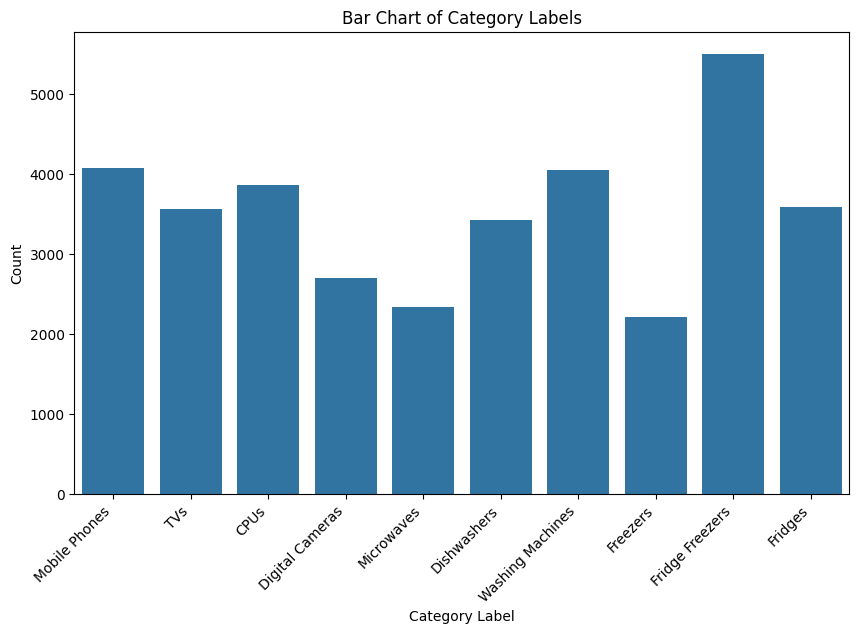

In [10]:
# prompt: bar chart of categorical features

import matplotlib.pyplot as plt
import seaborn as sns

# Assuming ' Category Label' is the categorical feature you want to visualize
plt.figure(figsize=(10, 6))
sns.countplot(x=' Category Label', data=df)
plt.title('Bar Chart of Category Labels')
plt.xlabel('Category Label')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right') # Rotate x-axis labels for better readability if needed
plt.show()

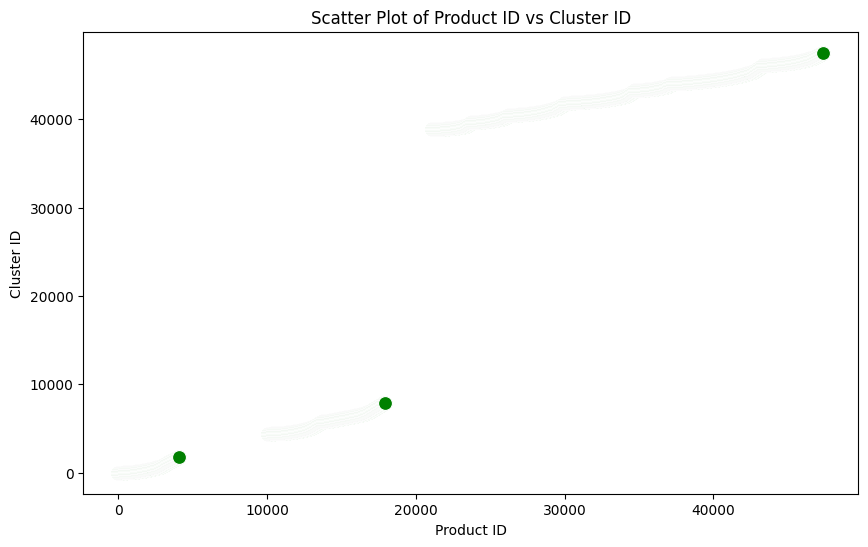

In [12]:
# Scatter plot for 'Product ID' vs 'Cluster ID'
plt.figure(figsize=(10, 6))
sns.scatterplot(x=df['Product ID'], y=df[' Cluster ID'], data=df, color='green', s=100)
plt.title('Scatter Plot of Product ID vs Cluster ID')
plt.xlabel('Product ID')
plt.ylabel('Cluster ID')
plt.show()


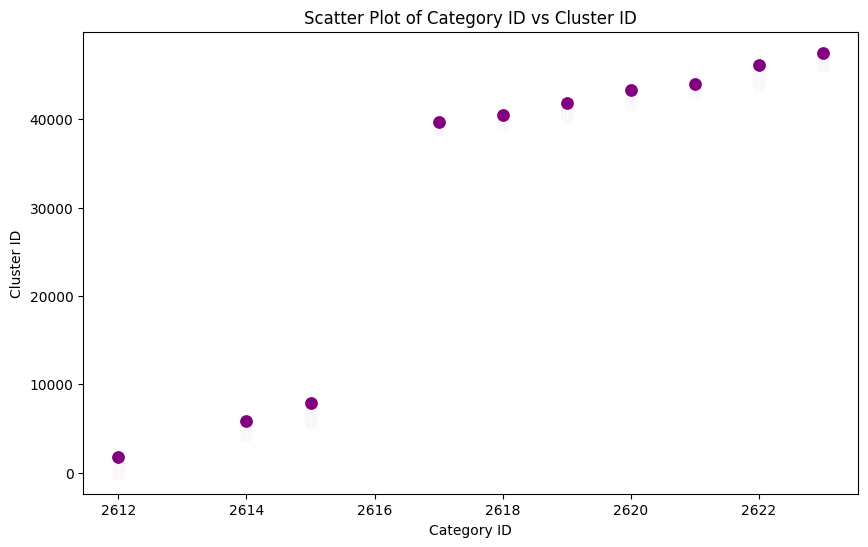

In [13]:
# Scatter plot for 'Category ID' vs 'Cluster ID'
plt.figure(figsize=(10, 6))
sns.scatterplot(x=df[' Category ID'], y=df[' Cluster ID'], data=df, color='purple', s=100)
plt.title('Scatter Plot of Category ID vs Cluster ID')
plt.xlabel('Category ID')
plt.ylabel('Cluster ID')
plt.show()


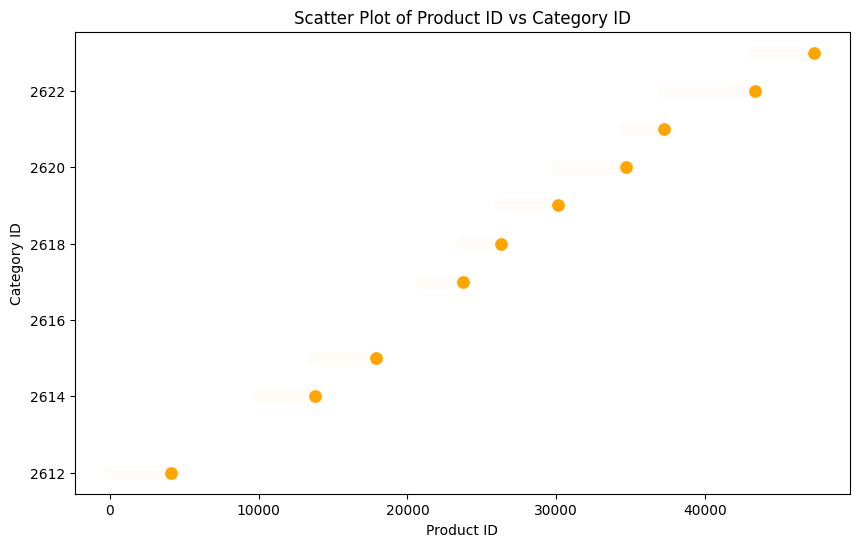

In [14]:
# Scatter plot for 'Product ID' vs 'Category ID'
plt.figure(figsize=(10, 6))
sns.scatterplot(x=df['Product ID'], y=df[' Category ID'], data=df, color='orange', s=100)
plt.title('Scatter Plot of Product ID vs Category ID')
plt.xlabel('Product ID')
plt.ylabel('Category ID')
plt.show()


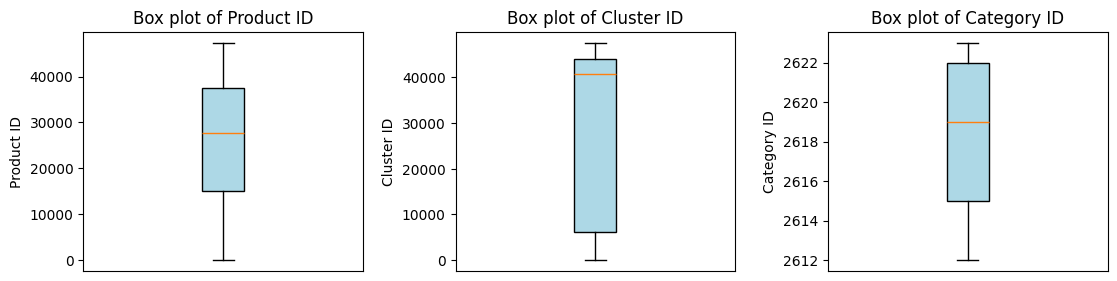

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns

# Remove leading/trailing spaces from column names
df.columns = df.columns.str.strip()

# Define numerical columns after cleaning column names
numerical_columns = ['Product ID', 'Cluster ID', 'Category ID']  # Ensure no extra spaces

# Create boxplot for each numerical feature
plt.figure(figsize=(15, 8))
for i,numerical_columns in enumerate(numerical_columns):
    plt.subplot(3, 4, i+1)
    plt.boxplot(df[numerical_columns],vert=True,patch_artist=True,boxprops=dict(facecolor='lightblue'))
    plt.title(f"Box plot of {numerical_columns}")
    plt.ylabel(numerical_columns)
    plt.xticks([])
plt.tight_layout()
plt.show()


In [16]:

from sklearn.preprocessing import LabelEncoder

# Encode categorical columns
categorical_columns = ['Cluster Label', 'Category Label']
label_encoders = {}

for col in categorical_columns:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le


In [17]:
df.head()

,Product ID,Product Title,Merchant ID,Cluster ID,Cluster Label,Category ID,Category Label
0,1,apple iphone 8 plus 64gb silver,1,1,909,2612,7
1,2,apple iphone 8 plus 64 gb spacegrau,2,1,909,2612,7
2,3,apple mq8n2b/a iphone 8 plus 64gb 5.5 12mp sim...,3,1,909,2612,7
3,4,apple iphone 8 plus 64gb space grey,4,1,909,2612,7
4,5,apple iphone 8 plus gold 5.5 64gb 4g unlocked ...,5,1,909,2612,7


In [18]:
df = df.drop('Product Title', axis=1)

In [19]:
df.head()

,Product ID,Merchant ID,Cluster ID,Cluster Label,Category ID,Category Label
0,1,1,1,909,2612,7
1,2,2,1,909,2612,7
2,3,3,1,909,2612,7
3,4,4,1,909,2612,7
4,5,5,1,909,2612,7


In [21]:
from sklearn.preprocessing import MinMaxScaler

# Columns to scale based on distribution
columns_to_scale = ['Cluster ID', 'Category ID', 'Category Label']

# Initialize Min-Max Scaler
scaler = MinMaxScaler()

# Apply Min-Max Scaling
df_scaled = df.copy()
df_scaled[columns_to_scale] = scaler.fit_transform(df[columns_to_scale])

print("Scaled Data (Min-Max Scaling):")
print(df_scaled.head())


Scaled Data (Min-Max Scaling):
   Product ID  Merchant ID  Cluster ID  Cluster Label  Category ID  \
0           1            1         0.0            909          0.0   
1           2            2         0.0            909          0.0   
2           3            3         0.0            909          0.0   
3           4            4         0.0            909          0.0   
4           5            5         0.0            909          0.0   

   Category Label  
0        0.777778  
1        0.777778  
2        0.777778  
3        0.777778  
4        0.777778  


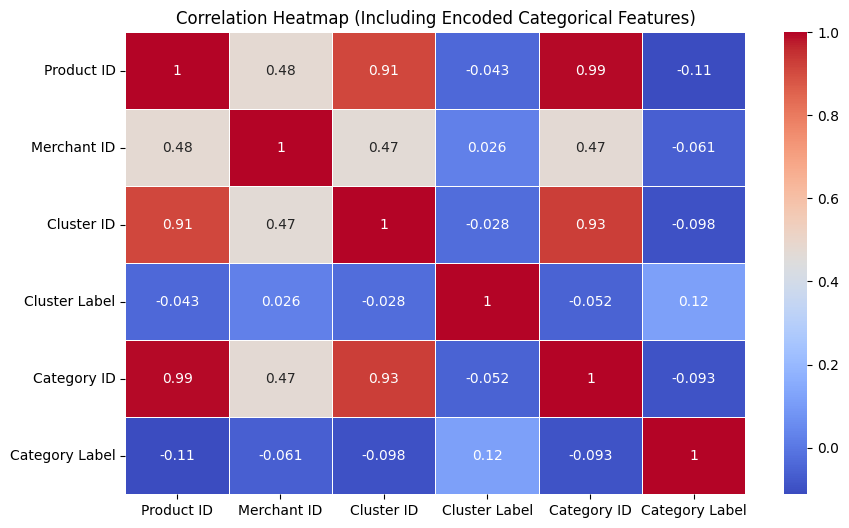

In [22]:

# Recalculate correlation matrix with encoded columns
correlation_matrix = df_scaled.corr()

# Create a heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap (Including Encoded Categorical Features)')
plt.show()

2 clusters - Silhouette Score: 0.55, Inertia: 2246830367198.85
3 clusters - Silhouette Score: 0.48, Inertia: 1247011575310.00
4 clusters - Silhouette Score: 0.49, Inertia: 873954126389.12
5 clusters - Silhouette Score: 0.44, Inertia: 673569994955.77
6 clusters - Silhouette Score: 0.45, Inertia: 560165372482.27
7 clusters - Silhouette Score: 0.46, Inertia: 465308428401.07
8 clusters - Silhouette Score: 0.45, Inertia: 396762117582.66
9 clusters - Silhouette Score: 0.46, Inertia: 330470687558.95
10 clusters - Silhouette Score: 0.47, Inertia: 277607260759.12
Best number of clusters based on silhouette score: 2


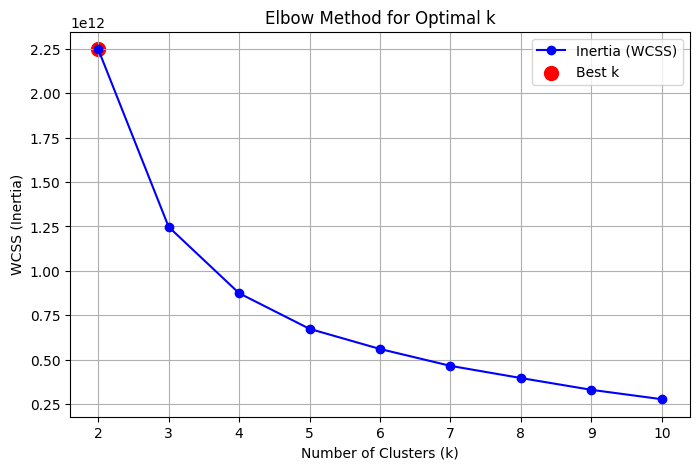

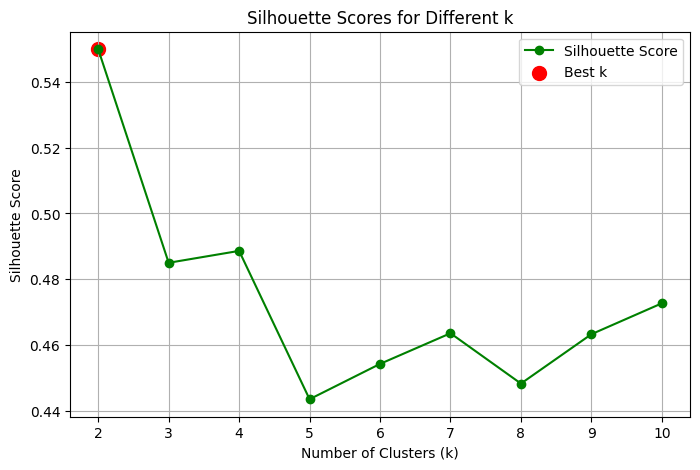

In [24]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import RobustScaler

scaled_data = df_scaled

# Function to compute silhouette scores and inertia for different cluster counts
def one_silhouette_inertia(n, data):
    kmeans = KMeans(n_clusters=n, n_init=20, random_state=42)
    kmeans.fit(data)
    labels = kmeans.labels_
    silhouette = silhouette_score(data, labels)
    inertia = kmeans.inertia_
    return silhouette, inertia, kmeans.cluster_centers_

# Evaluate clusters for k = 2 to 10
silhouette_scores = []
inertia_values = []
best_n, best_silhouette = None, -np.inf

for n in range(2, 11):
    silhouette, inertia, _ = one_silhouette_inertia(n, scaled_data)
    silhouette_scores.append(silhouette)
    inertia_values.append(inertia)
    if silhouette > best_silhouette:
        best_n = n
        best_silhouette = silhouette
    print(f"{n} clusters - Silhouette Score: {silhouette:.2f}, Inertia: {inertia:.2f}")

print(f"Best number of clusters based on silhouette score: {best_n}")

# Plot the Elbow Method
def plot_elbow_method(inertia_values, best_n):
    plt.figure(figsize=(8, 5))
    plt.plot(range(2, 11), inertia_values, 'bo-', label="Inertia (WCSS)")
    plt.scatter(best_n, inertia_values[best_n - 2], color='red', label="Best k", s=100)
    plt.title("Elbow Method for Optimal k")
    plt.xlabel("Number of Clusters (k)")
    plt.ylabel("WCSS (Inertia)")
    plt.legend()
    plt.grid()
    plt.show()

plot_elbow_method(inertia_values, best_n)

# Visualize Silhouette Scores
plt.figure(figsize=(8, 5))
plt.plot(range(2, 11), silhouette_scores, 'go-', label="Silhouette Score")
plt.scatter(best_n, silhouette_scores[best_n - 2], color='red', label="Best k", s=100)
plt.title("Silhouette Scores for Different k")
plt.xlabel("Number of Clusters (k)")
plt.ylabel("Silhouette Score")
plt.legend()
plt.grid()
plt.show()



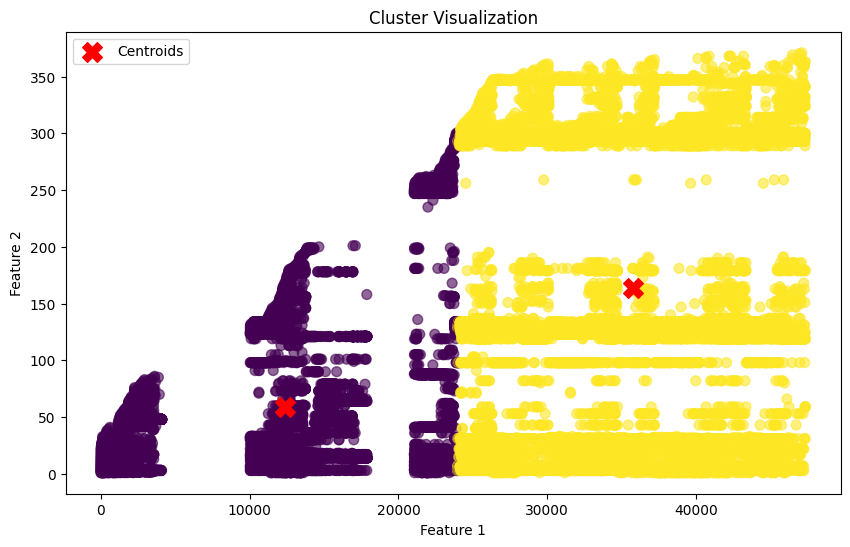

In [25]:
scaled_data = scaled_data.to_numpy()  # Convert DataFrame to NumPy array

# Fit K-Means with the optimal number of clusters
kmeans = KMeans(n_clusters=best_n, n_init=20, random_state=42)
kmeans.fit(scaled_data)
labels = kmeans.labels_
centroids = kmeans.cluster_centers_


# Plot the clusters (using the first two dimensions)
def plot_clusters(data, labels, centroids):
    plt.figure(figsize=(10, 6))
    plt.scatter(data[:, 0], data[:, 1], c=labels, cmap='viridis', s=50, alpha=0.6)
    plt.scatter(centroids[:, 0], centroids[:, 1], c='red', s=200, marker='X', label='Centroids')
    plt.title("Cluster Visualization")
    plt.xlabel("Feature 1")
    plt.ylabel("Feature 2")
    plt.legend()
    plt.show()

plot_clusters(scaled_data, labels, centroids)

a (slope) = 0.0000 ± 0.0000
b (intercept) = -0.0715 ± 0.0004


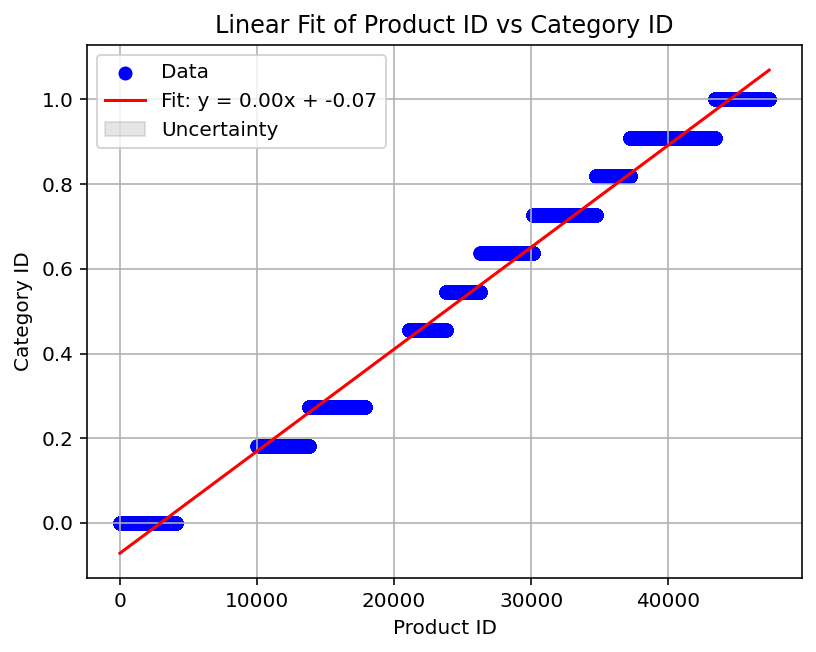

Chi-Squared = 53164466823.27
Reduced Chi-Squared = 1505691.66


In [27]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit


# Replace zeros in y with a small value to avoid division by zero
y = np.where(y == 0, 1e-10, y)

# Define the fitting function (a straight line)
def linear_func(x, a, b):
    return a * x + b

# Perform the fitting
popt, pcov = curve_fit(linear_func, x, y)
a, b = popt
sigma_a, sigma_b = np.sqrt(np.diag(pcov))

# Print the fitting results
print(f"a (slope) = {a:.4f} ± {sigma_a:.4f}")
print(f"b (intercept) = {b:.4f} ± {sigma_b:.4f}")

# Create the fitted line
x_fit = np.linspace(min(x), max(x), 1000)
y_fit = linear_func(x_fit, a, b)

# Plot the data and the fitted line
plt.figure(dpi=144)
plt.scatter(x, y, color='blue', label='Data')
plt.plot(x_fit, y_fit, color='red', label=f'Fit: y = {a:.2f}x + {b:.2f}')
plt.fill_between(x_fit,
                 linear_func(x_fit, a - sigma_a, b - sigma_b),
                 linear_func(x_fit, a + sigma_a, b + sigma_b),
                 color='gray', alpha=0.2, label="Uncertainty")
plt.xlabel('Product ID')
plt.ylabel('Category ID')
plt.title('Linear Fit of Product ID vs Category ID')
plt.legend()
plt.grid()
plt.show()

# Goodness of Fit: Reduced Chi-Square
residuals = y - linear_func(x, a, b)
chi_squared = np.sum((residuals)**2 / y)
reduced_chi_squared = chi_squared / (len(x) - 2)  # Degrees of freedom: N - p
print(f"Chi-Squared = {chi_squared:.2f}")
print(f"Reduced Chi-Squared = {reduced_chi_squared:.2f}")
